<a href="https://colab.research.google.com/github/Mohan-Prasanth20/Ford-Car-Price-Dataset/blob/main/Machine_learning_on_ford_car_price_prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ford Car Price Prediction
#Predicting the price of used Ford Cars

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


<ipython-input-59-71200f2b5719>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [ ]:
df = pd.read_csv("/ford.csv")

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df.columns


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

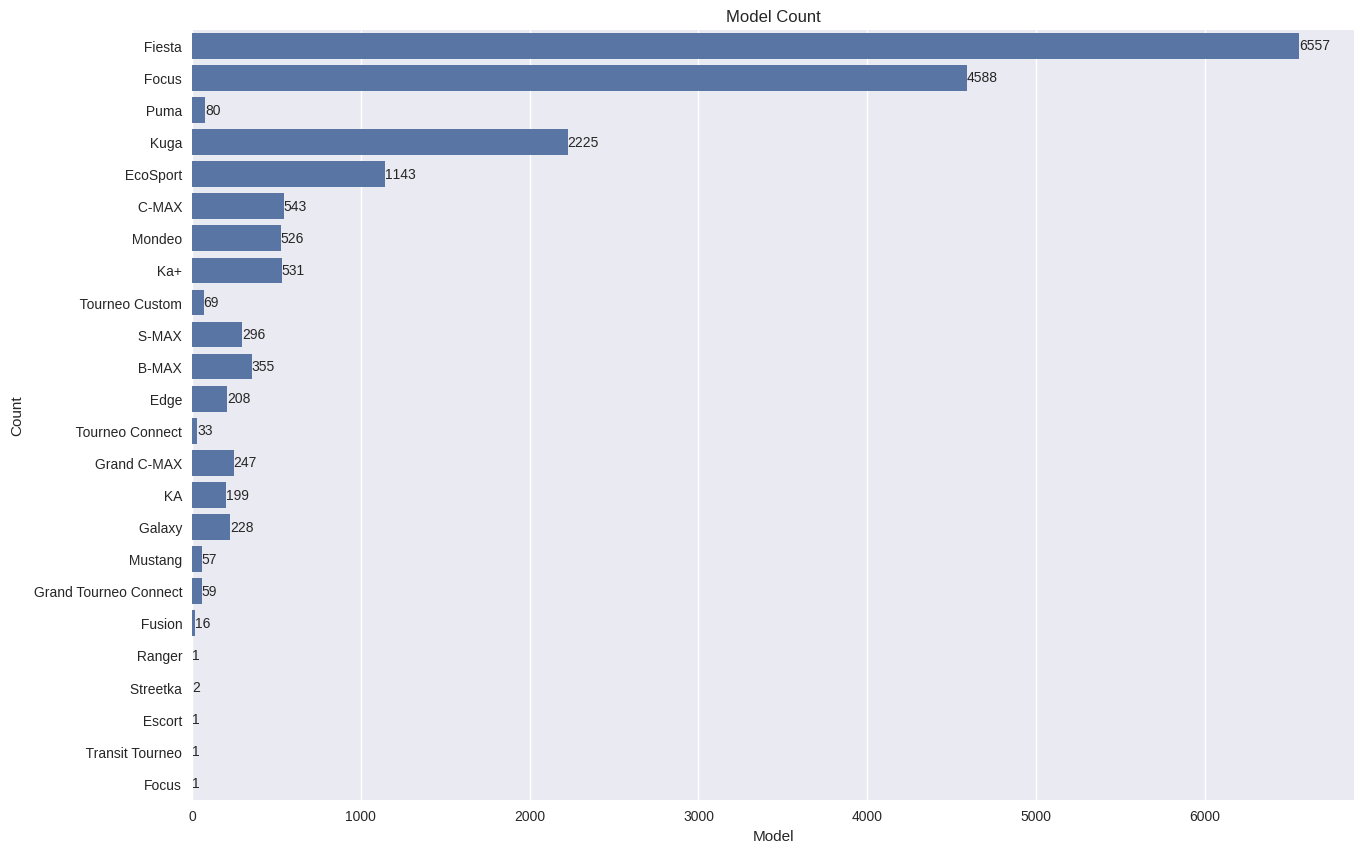

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y= 'model',data= df)
plt.title('Model Count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.bar_label(plt.gca().containers[0])
plt.show()

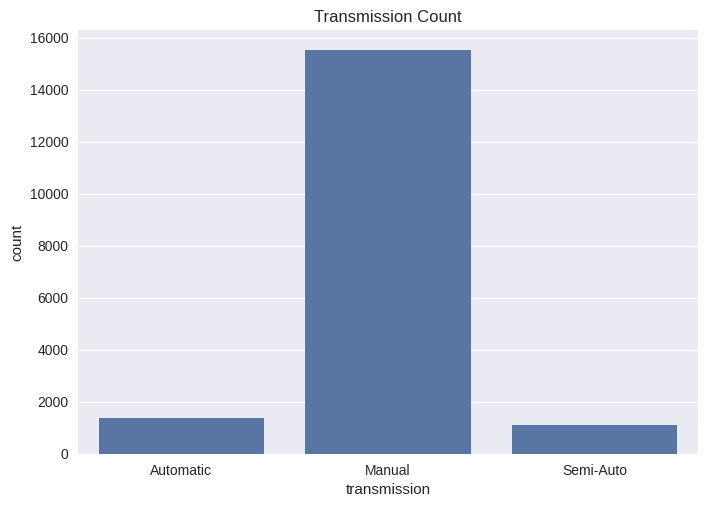

In [ ]:
sns.countplot(x= 'transmission',data= df)
plt.title('Transmission Count')
plt.show()


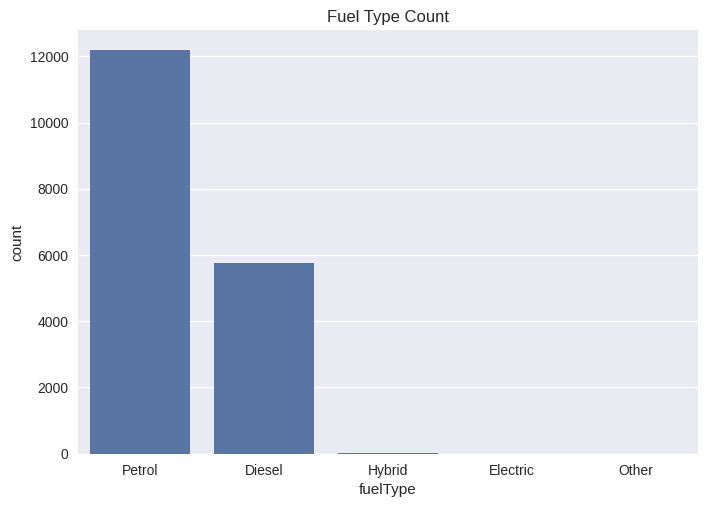

In [ ]:
sns.countplot(x= 'fuelType',data= df)
plt.title('Fuel Type Count')
plt.show()

In [ ]:
print(df['model'].value_counts())
print("\n\n")
print(df['transmission'].value_counts())
print("\n\n")
print(df['fuelType'].value_counts())


model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64



transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64



fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int

In [ ]:
price = df['price']
price.describe()

count    17966.000000
mean     12279.534844
std       4741.343657
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64

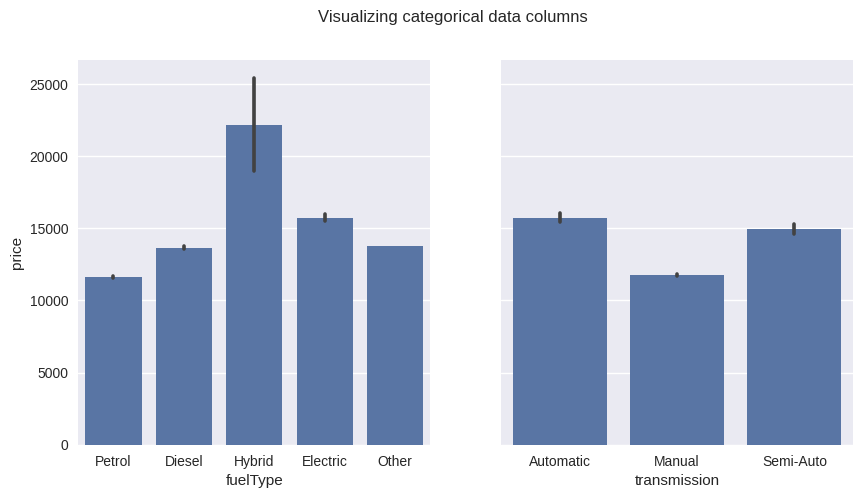

In [ ]:
fueltype = df['fuelType']
price = df['price']
tranmission = df['transmission']
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
fig.suptitle('Visualizing categorical data columns')
sns.barplot(x='fuelType',y='price',data=df, ax=axes[0])
sns.barplot(x='transmission',y='price', data=df, ax=axes[1])
plt.show()



In [ ]:
df.replace({'transmission':{'Manual':0,'Automatic':1,'Semi-Auto':3}} , inplace=True)
df.replace({'fuelType':{'Petrol':0,'Diesel':1,'Hybrid':2, 'Electric':3, 'Other':4}} , inplace=True)

In [ ]:
df = df.drop("model", axis=1)
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


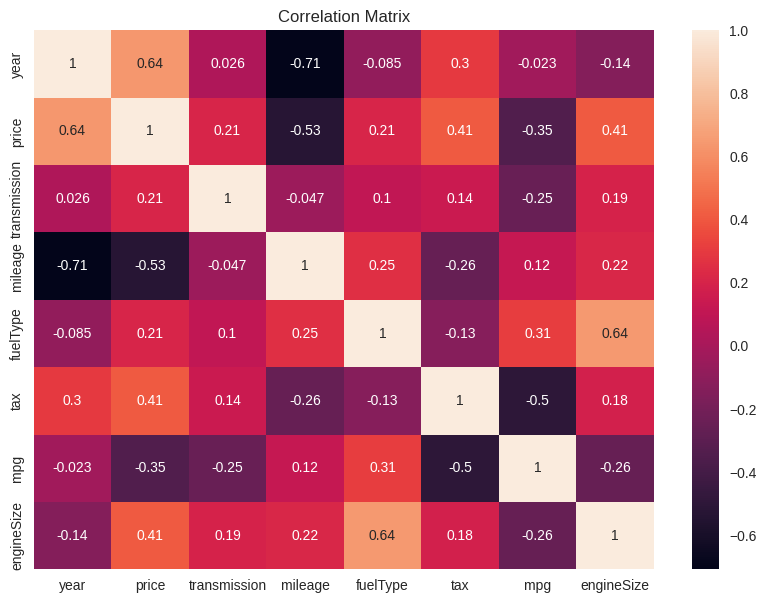

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.corr()['price']

year            0.636009
price           1.000000
transmission    0.209753
mileage        -0.530659
fuelType        0.209225
tax             0.406857
mpg            -0.346419
engineSize      0.411178
Name: price, dtype: float64

<Axes: title={'center': 'Correlation between year and price'}, xlabel='price', ylabel='year'>

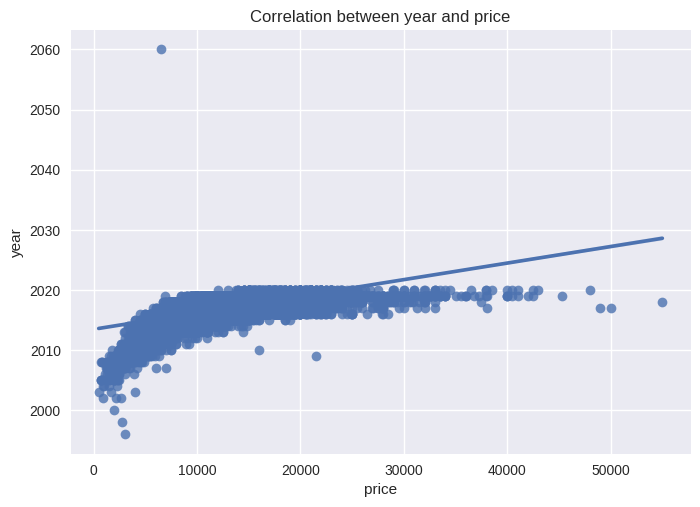

In [ ]:
#plt.figure(figsize=(10,7))
fig = figsize=(9,7)
plt.title('Correlation between year and price')
sns.regplot(x='price', y='year', data=df)


In [ ]:
x = df.drop('price',axis= 1)
y = df['price']

In [ ]:
print("Shape of x is :", x.shape)
print("Shape of y is :", y.shape)

Shape of x is : (17966, 7)
Shape of y is : (17966,)


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,2017,8999,0,16700,0,150,47.1,1.4
17962,2014,7499,0,40700,0,30,57.7,1.0
17963,2015,9999,0,7010,1,20,67.3,1.6
17964,2018,8299,0,5007,0,145,57.7,1.2
17965,2015,8299,0,5007,0,22,57.7,1.0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print("Shape of X_train is: ", x_train.shape)
print("Shape of y_train is: ", y_train.shape)
print("Shape of X_test is: ", x_test.shape)
print("Shape of y_test is: ", y_test.shape)

Shape of X_train is:  (14372, 7)
Shape of y_train is:  (14372,)
Shape of X_test is:  (3594, 7)
Shape of y_test is:  (3594,)


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_pred = linreg.predict(x_test)

In [ ]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of linear regression model is:", linreg_mae)
print("R2 score of linear regression model is:", linreg_r2)

MAE of linear regression model is: 1742.2354030753893
R2 score of linear regression model is: 0.7417883910274704


In [ ]:
linreg_score = cross_val_score(linreg, x_test, y_test, cv=4)
print("Linear Regression model accuracy is: {}".format(linreg_score.mean()*100))

Linear Regression model accuracy is: 73.29320246794617


In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

In [ ]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print("MAE of decision tree model is:", dtree_mae)
print("R2 score of decision tree model is:", dtree_r2)

MAE of decision tree model is: 1185.8391764051196
R2 score of decision tree model is: 0.8610049246307994


In [ ]:
dtree_score = cross_val_score(dtree, X_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(dtree_score.mean()*100))

Decision Tree model accuracy is: 83.49962849212856


In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

In [ ]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("MAE of xgboost model is:", xgb_mae)
print("R2 score of xgboost model is:", xgb_r2)

MAE of xgboost model is: 918.9972529934059
R2 score of xgboost model is: 0.9171308943634221


In [ ]:
xgb_score = cross_val_score(xgb, x_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(xgb_score.mean()*100))

Decision Tree model accuracy is: 88.82224855467923


In [ ]:
df.columns


Index(['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [ ]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


In [ ]:
data = {'year':2017, 'transmission':1, 'mileage':15944, 'fuelType':0, 'tax':150, 'mpg':57.7,
       'engineSize':1.0}
index= [0]
new_df = pd.DataFrame(data, index)
new_df

,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,1,15944,0,150,57.7,1.0


In [ ]:
new_predict = xgb.predict(new_df)
print("The car price for the new data is: ", new_predict)


The car price for the new data is:  [11415.753]
